### Homework 2: Combined Cycle Power Plant Data Set
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Feb 9, 2024
### Submitted: Feb 10, 2024 (1 day late)

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Modeling
import statsmodels.api as sm

# Machine Learning Algorithms and Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import DistanceMetric
from scipy.linalg import pinv
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

# Feature Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Deep Learning
import tensorflow as tf
from tensorflow import keras

c:\Users\hjang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### (a)

In [2]:
xlsx_file_path = ".../data/CCPP/Folds5x2_pp.xlsx"
df = pd.read_excel(xlsx_file_path, sheet_name="Sheet1")

### (b)
### i.
### There are 9568 rows and 5 columns in this data set. Each row represents data that was collected from a Combined Cycle Power Plant when it was set to work with full load between year 2006 and 2011. Each column consist of hourly average ambient variables.
### AT is temperature in Celcius, V is exhaust vacuum in cm Hg, AP is pressure in milibar, RH is relative humidity in %, and PE is electrical energy output in MW.

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### ii.
### AP & PE and RH & PE are positively correlated. AT & PE and V & PE are negatively correlated.

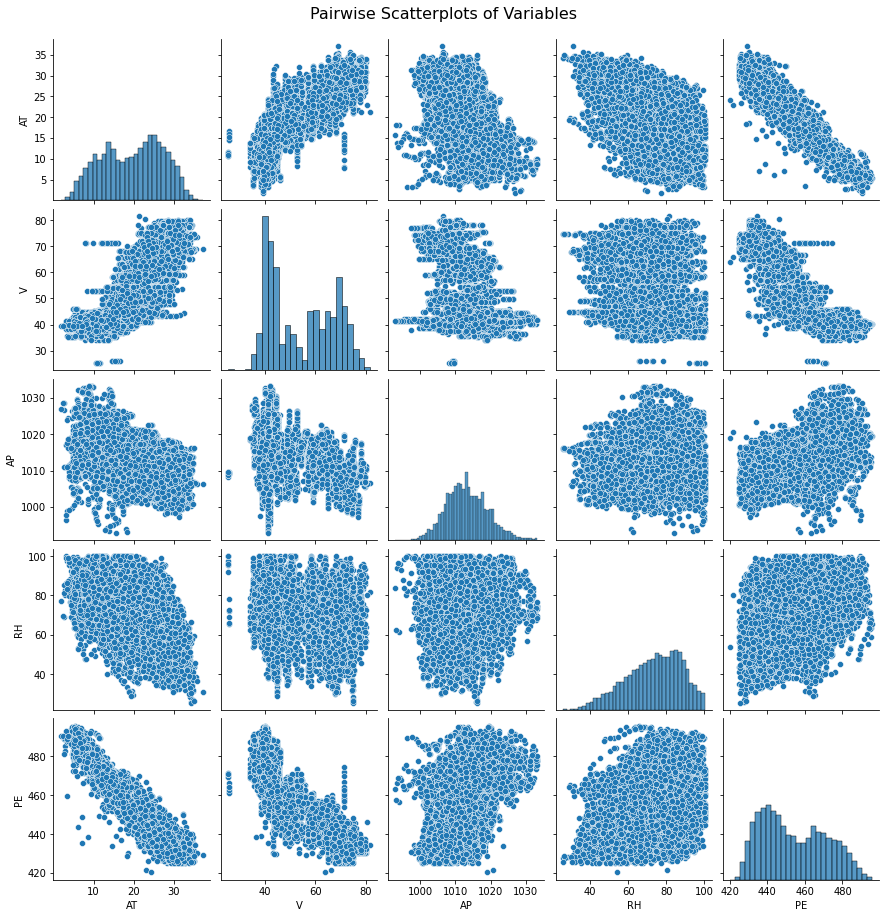

In [5]:
sns.pairplot(df)
plt.suptitle("Pairwise Scatterplots of Variables", y=1.02, size=16)
plt.show();

### iii. 
### 50% represents the median, while 25% and 75% correspond to the first and third quartiles, respectively.

In [6]:
summ_df = df.describe().transpose()
summ_df["iqr"] = df.quantile(0.75) - df.quantile(0.25)
summ_df

,count,mean,std,min,25%,50%,75%,max,iqr
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11,12.2100
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56,24.8000
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30,8.1600
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16,21.5025
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76,28.6800


### (c)
### Compared to the earlier pairplot, the correlation between variables becomes more evident in the SLR models. AT and V indicates negative correlation with PE, while AP and RH show a positive correlation with PE. Every model is statistically significant, as indicated by the p-value (Prob (F-statistic)) being less than 0.05. There are some outliers in each model where the first two models are more noticeable than the other. As the professor mentioned in class, it is generally not a good idea to remove any outliers because we are essentially changing the data. Removing outliers can introduce bias and should only be done if we suspect they could be faulty data; it should not be done for the purpose of data generation.

Simple Linear Regression for AT vs. PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:10:51   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

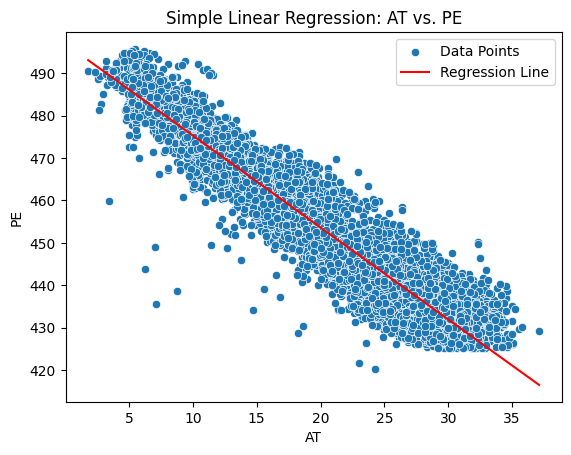

Simple Linear Regression for V vs. PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:11:14   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

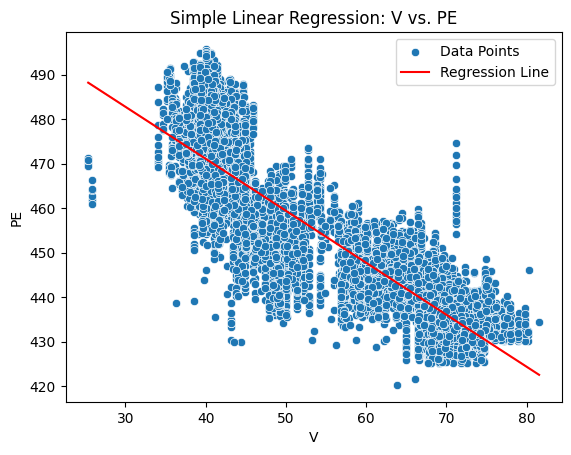

Simple Linear Regression for AP vs. PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:11:21   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

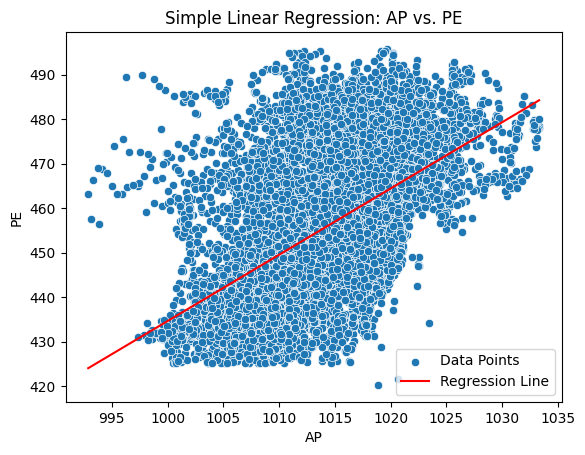

Simple Linear Regression for RH vs. PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:11:41   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

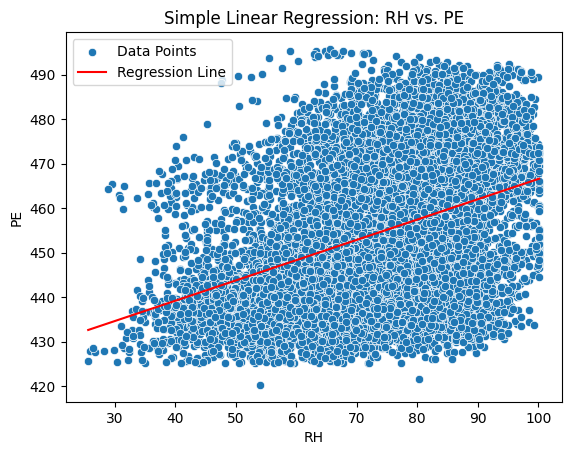

In [20]:
predictors = ["AT", "V", "AP", "RH"]
response_variable = "PE"

for predictor in predictors:
    model = sm.OLS(df[response_variable], sm.add_constant(df[predictor])).fit()

    print("Simple Linear Regression for " + predictor + " vs. " + response_variable + ":")
    print(model.summary())

    sns.scatterplot(x=df[predictor], y=df[response_variable], label="Data Points")
    sns.lineplot(x=df[predictor], y=model.predict(sm.add_constant(df[predictor])), color="red", label="Regression Line")
    plt.title("Simple Linear Regression: " + predictor + " vs. " + response_variable)
    plt.xlabel(predictor)
    plt.ylabel(response_variable)
    plt.legend()
    plt.show();

### (d)
### Based on the model summary, the p-values associated with each predictor's coefficient are all below 0.05, indicating statistical significance for each predictor. The coefficients for each predictor are -1.9775, -0.2339, 0.0621, and -0.1581, respectively. This suggests that each predictor has a significant impact on predicting the net hourly (PE). Therefore we can reject the null hypothesis for all predictors, affirming their individual importance in the multiple regression model for predicting PE.

In [21]:
X = df[predictors]
X = sm.add_constant(X)
y = df[response_variable]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:12:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### (e)
### There is a noticeable pattern in the comparison between univariate and multiple regression coefficients. While the univariate coefficients and multiple coefficients show a similar trend, the multiple coefficients tend to converge toward zero. This convergence suggests a refining effect when combining all predictors into a single model. The slight variation between the two sets of coefficients emphasizes the impact of considering multiple predictors simultaneously, providing a more comprehensive understanding of the relationships within the data.

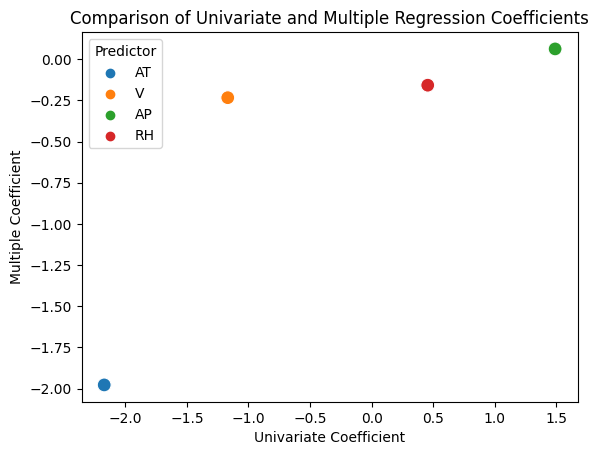

In [22]:
univariate_coef = [-2.1713, -1.1681, 1.4899, 0.4557]
multiple_coef = [-1.9775, -0.2339, 0.0621, -0.1581]

data = {"Predictor": ["AT", "V", "AP", "RH"],
        "Univariate Coefficient": univariate_coef,
        "Multiple Coefficient": multiple_coef}

df_coefficients = pd.DataFrame(data)

sns.scatterplot(data=df_coefficients, x="Univariate Coefficient", y="Multiple Coefficient", hue="Predictor", s=100)
plt.title("Comparison of Univariate and Multiple Regression Coefficients")
plt.xlabel("Univariate Coefficient")
plt.ylabel("Multiple Coefficient")
plt.legend(title="Predictor")
plt.show();

### (f)
### There is a nonlinear association between the predictors and the response. The coefficients for the quadratic and cubic terms are statistically significant for all predictors based on their p-value being less than 0.05. 

In [23]:
for predictor in predictors:
    X = df[predictor].values.reshape(-1, 1)
    y = df[response_variable].values

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)

    model = sm.OLS(y, X_poly).fit()

    print("Polynomial Regression for " + predictor + " vs. " + response_variable + " (Degree 3):")
    print(model.summary())

Polynomial Regression for AT vs. PE (Degree 3):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:13:11   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

### (g)
### There is evidence of an association of interactions between predictors and the response. When considering a significance level of p = 0.05, all interaction terms are statistically significant except for AT:AP and V:RH.

In [24]:
interaction_terms = []

for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        predictor1, predictor2 = predictors[i], predictors[j]
        interaction_term = predictor1 + "*" + predictor2
        interaction_terms.append(interaction_term)

formula = "PE ~ AT + V + AP + RH + " + " + ".join(interaction_terms)
model = sm.OLS.from_formula(formula, data=df).fit()

print("Full Linear Regression Model with Interaction Terms:")
print(model.summary())

Full Linear Regression Model with Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:13:40   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### (h)
### Model 2 is the best model for having the lowest MSE of 18.65

In [13]:
X = df[predictors]
y = df[response_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_model1 = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_model1).fit()

y_pred_model1 = model1.predict(sm.add_constant(X_test))

mse_model1 = mean_squared_error(y_test, y_pred_model1)
print("MSE for Model 1:", mse_model1)

MSE for Model 1: 21.23985693822559


In [25]:
X_train_model2 = sm.add_constant(X_train.copy())

for col in X_train.columns:
    X_train_model2[col + '_squared'] = X_train[col] ** 2
    for col2 in X_train.columns:
        if col != col2:
            X_train_model2[col + '_' + col2] = X_train[col] * X_train[col2]

model2 = sm.OLS(y_train, X_train_model2).fit()

X_test_model2 = sm.add_constant(X_test.copy())
for col in X_test.columns:
    X_test_model2[col + '_squared'] = X_test[col] ** 2
    for col2 in X_test.columns:
        if col != col2:
            X_test_model2[col + '_' + col2] = X_test[col] * X_test[col2]

y_pred_model2 = model2.predict(X_test_model2)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
print("MSE for Model 2 (with all interactions):", mse_model2)

MSE for Model 2 (with all interactions): 18.6473124786063


In [15]:
significant_vars_model2 = model2.pvalues[model2.pvalues < 0.05].index
X_train_model2_sig = X_train_model2[significant_vars_model2]
X_test_model2_sig = X_test_model2[significant_vars_model2]

model3 = sm.OLS(y_train, X_train_model2_sig).fit()

y_pred_model3_sig = model3.predict(X_test_model2_sig)

mse_model3_sig = mean_squared_error(y_test, y_pred_model3_sig)
print("MSE Model 3 (with significant interactions):",  mse_model3_sig)

MSE Model 3 (with significant interactions): 19.221018954940423


### (i)

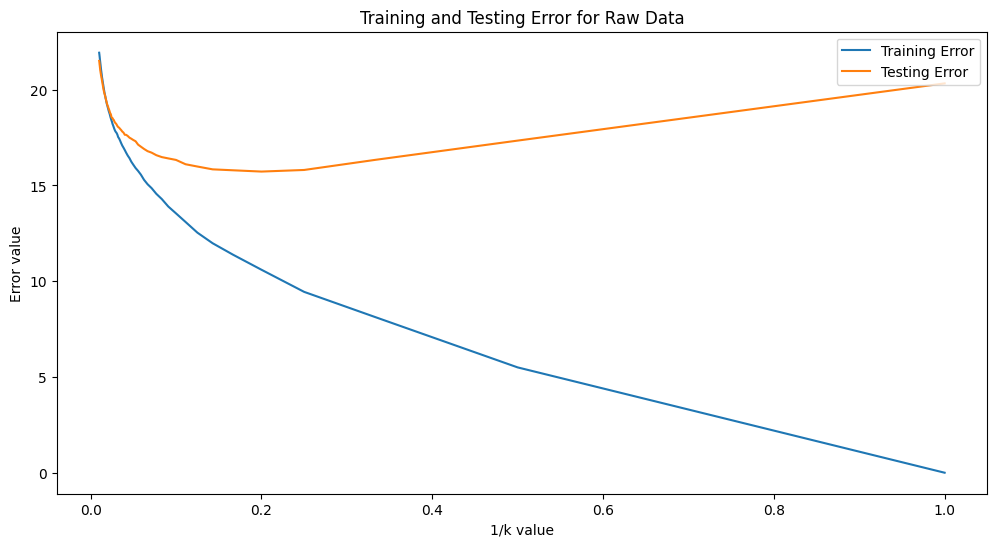

The best k value: 5
The best test error: 15.726819842563568


In [26]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

best_test_error = 1000
knn_r2_score = 0
best_k = -1

train_error = {}
test_error = {}

for k in range(1, 101):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_copy, y_train)
    y_train_pred = knn_regressor.predict(X_train_copy)
    y_test_pred = knn_regressor.predict(X_test_copy)
    training_error = metrics.mean_squared_error(y_train, y_train_pred)
    testing_error = metrics.mean_squared_error(y_test, y_test_pred)
    train_error[1/k] = training_error
    test_error[1/k] = testing_error
    
    if best_test_error > testing_error:
        best_test_error = testing_error
        knn_r2_score = metrics.r2_score(y_test, y_test_pred)
        best_k = k

plt.figure(figsize=(12, 6))
plt.plot(*zip(*sorted(train_error.items())), label="Training Error")
plt.plot(*zip(*sorted(test_error.items())), label="Testing Error")
plt.title("Training and Testing Error for Raw Data")
plt.xlabel("1/k value")
plt.ylabel("Error value")
plt.legend(loc="upper right")
plt.show();

print("The best k value:", best_k)
print("The best test error:", best_test_error)

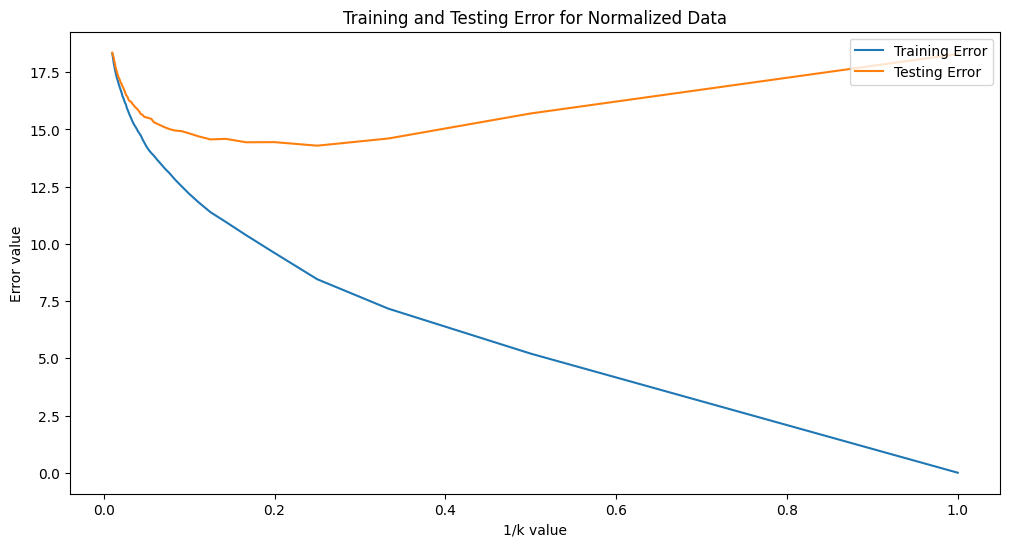

The best k value: 4
The best test error: 14.291333431295715


In [27]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

scaler = MinMaxScaler()
scaler.fit(X_train_copy)
X_train_copy_transformed = scaler.transform(X_train_copy)
X_test_copy_transformed = scaler.transform(X_test_copy)

knn_scaled_r2_score = 0
train_error = {}
test_error = {}
best_test_error_scaled = 1000
best_k_scaled = -1

for k in range(1, 101):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_copy_transformed, y_train)
    y_train_pred = knn_regressor.predict(X_train_copy_transformed)
    y_test_pred = knn_regressor.predict(X_test_copy_transformed)
    training_error = metrics.mean_squared_error(y_train, y_train_pred)
    testing_error = metrics.mean_squared_error(y_test, y_test_pred)
    train_error[1/k] = training_error
    test_error[1/k] = testing_error
    
    if best_test_error_scaled > testing_error:
        best_test_error_scaled = testing_error
        knn_scaled_r2_score = metrics.r2_score(y_test, y_test_pred)
        best_k_scaled = k

plt.figure(figsize=(12, 6))
plt.plot(*zip(*sorted(train_error.items())), label="Training Error")
plt.plot(*zip(*sorted(test_error.items())), label="Testing Error")
plt.title("Training and Testing Error for Normalized Data")
plt.xlabel("1/k value")
plt.ylabel("Error value")
plt.legend(loc="upper right")
plt.show();

print("The best k value:", best_k_scaled)
print("The best test error:", best_test_error_scaled)

### (j)
### MSE for Linear Regression: 18.65
### MSE for KNN Regressiom: 15.73
### MSE for Normalized KNN Regression: 14.29
### KNN Regression performs better than Linear Regression for Raw Features.
### KNN Regression performs better than Linear Regression for Normalized Features.
### Normalization and for being a non-linear model seems to have a positive impact on KNN's performance, making it the best-performing model with the lowest test error.

### 2. ISLR: 2.4.1
### (a) Better. A large sample size suggests that a flexible model will perform better as it can effectively fit the data.
### (b) Worse. A flexible model would likely overfit in this case, as flexible methods tend to perform worse when the dataset is small.
### (c) Better. Flexible methods generally perform better on non-linear datasets. This is because they have more degrees of freedom to approximate non-linear relationships.
### (d) Worse. A flexible model would likely overfit due to closely fitting the noise in the error terms, especially when the variance of the error terms is extremely high.

### (3) ISLR: 2.4.7
### (a)


In [18]:
test_point = (0, 0, 0)
observations = [(3, 0, 0), (2, 0, 0), (0, 1, 3), (0, 1, 2), (-1, 0, 1), (1, 1, 1)]
distances = [math.sqrt(sum((test_point[i] - obs[i])**2 for i in range(3))) for obs in observations]

distances

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

### (b) The prediction with K = 1 is Green because the nearest single observation is green.

### (c) The prediction with K = 3 is Red. The three nearest observations are Green, Red, and Red. The probability of the test point belonging to Red is 2/3 and Green is 1/3, therefore the prediction is Red.

### (d) For highly non-linear boundaries, a smaller value of K is preferred, as it leads to a more flexible KNN model capable of capturing non-linear relationships. On the other hand, a larger K would tend to produce a decision boundary closer to a linear shape. This may not effectively represent highly non-linear data patterns.